### **Image Localization Dataset**

<p align="center"><img src="https://github.com/MuhammedBuyukkinaci/Object-Classification-and-Localization-with-TensorFlow/raw/master/repository_images/3in1.jpg" width="60%"/>

This is a dataset created for image localization tasks (SINGLE object).

Download the dataset from kaggle from [here](https://www.kaggle.com/mbkinaci/image-localization-dataset) 


In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [2]:
!ls "/content/drive/My Drive/Colab Notebooks/Deep-learning-for-computer-vision/Image_Localization"

Vegetable_dataset.zip


In [121]:
print("[INFO] Extracting Dataset .....")
!unzip -q "/content/drive/My Drive/Colab Notebooks/Deep-learning-for-computer-vision/Image_Localization/Vegetable_dataset.zip"

[INFO] Extracting Dataset .....
replace training_images/cucumber_1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [123]:
!ls

drive  logs  sample_data  training_images


Thier are 2 set of folder of same name ,  so we remove one dublicate training folder.

### **Folder structure** <br/>

📁 training_images <br/> 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 📁 training_images <br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  📄  cucumber_1.jpg<br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  📄  cucumber_1.xml <br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  📄  ...<br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  📄  ...<br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  📄  mushroom_61.txt<br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  📄  mushroom_61.xml

In [124]:
cd training_images

/content/training_images


In [125]:
!ls

cucumber_10.jpg  cucumber_53.jpg  eggplant_39.jpg  mushroom_25.jpg
cucumber_10.xml  cucumber_53.xml  eggplant_39.xml  mushroom_25.xml
cucumber_11.jpg  cucumber_54.jpg  eggplant_3.jpg   mushroom_26.jpg
cucumber_11.xml  cucumber_54.xml  eggplant_3.xml   mushroom_26.xml
cucumber_12.jpg  cucumber_55.jpg  eggplant_40.jpg  mushroom_27.jpg
cucumber_12.xml  cucumber_55.xml  eggplant_40.xml  mushroom_27.xml
cucumber_13.jpg  cucumber_56.jpg  eggplant_41.jpg  mushroom_28.jpg
cucumber_13.xml  cucumber_56.xml  eggplant_41.xml  mushroom_28.xml
cucumber_14.jpg  cucumber_57.jpg  eggplant_42.jpg  mushroom_29.jpg
cucumber_14.xml  cucumber_57.xml  eggplant_42.xml  mushroom_29.xml
cucumber_15.jpg  cucumber_58.jpg  eggplant_43.jpg  mushroom_2.jpg
cucumber_15.xml  cucumber_58.xml  eggplant_43.xml  mushroom_2.xml
cucumber_16.jpg  cucumber_59.jpg  eggplant_44.jpg  mushroom_30.jpg
cucumber_16.xml  cucumber_59.xml  eggplant_44.xml  mushroom_30.xml
cucumber_17.jpg  cucumber_5.jpg   eggplant_45.jpg  mushroom_31.j

In [126]:
!rm -rf training_images

Going to root directory

In [127]:
cd ..

/content


In [128]:
!ls

drive  logs  sample_data  training_images


#### [LabelImg](https://youtu.be/p0nR2YsCY_U) is a graphical image annotation tool and label object bounding boxes in images .

<p align="center"><img src="https://i.ibb.co/Qb5g39p/LabelIMG.png" alt="LabelIMG" border="0" width="70%"/>

cucumber_1.xml

```xml
<annotation>
	<folder>single cucumber</folder>
	<filename>cucumber_1.jpg</filename>
	<path>C:\Users\Muhammed Buyukkinaci\Downloads\single cucumber\cucumber_1.jpg</path>
	<source>
		<database>Unknown</database>
	</source>
	<size>
		<width>227</width>
		<height>227</height>
		<depth>3</depth>
	</size>
	<segmented>0</segmented>
	<object>
		<name>cucumber</name>
		<pose>Unspecified</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>23</xmin>
			<ymin>42</ymin>
			<xmax>206</xmax>
			<ymax>199</ymax>
		</bndbox>
	</object>
</annotation>

```

References :

* [Object Classification and Localization with TensorFlow](https://github.com/MuhammedBuyukkinaci/Object-Classification-and-Localization-with-TensorFlow)


### **Folder structure** <br/>

📁 training_images <br/> 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  📄  cucumber_1.jpg<br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  📄  cucumber_1.xml <br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  📄  ...<br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  📄  ...<br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  📄  mushroom_61.txt<br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  📄  mushroom_61.xml

In [ ]:
!ls training_images/

### **Import package**

In [130]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import random
from glob import glob
import datetime
import tqdm

from tensorflow.keras.layers import Conv2D , Dropout , BatchNormalization, MaxPooling2D , Dense, Input,LeakyReLU,Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint,ReduceLROnPlateau,TensorBoard
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from keras.constraints import max_norm
from keras.initializers import he_uniform
from keras.regularizers import l2

In [ ]:
# important for reproducibility
# this allows to generate the same random numbers

seed = 42
random.seed = seed
np.random.seed = seed

In [131]:
total_file = len([i for i in os.listdir('training_images')])
print(total_file)

372


In [132]:
root = 'training_images/'
image_src = 'training_images/*.jpg'
annotate_src = 'training_images/*.xml'

### **Get all .jpg image**

In [133]:
train_images = glob(image_src)
print(train_images[:5])

['training_images/mushroom_12.jpg', 'training_images/cucumber_10.jpg', 'training_images/cucumber_35.jpg', 'training_images/eggplant_62.jpg', 'training_images/eggplant_43.jpg']


### **Get all .xml file**

In [134]:
annotate_file = glob(annotate_src)
print(annotate_file[:5])

['training_images/eggplant_54.xml', 'training_images/eggplant_13.xml', 'training_images/cucumber_50.xml', 'training_images/eggplant_61.xml', 'training_images/mushroom_23.xml']


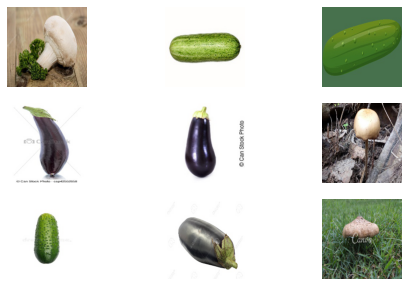

In [229]:
from matplotlib.image import imread

plt.figure(figsize=(8,5))

'''
All image size in the dataset is 227*227
'''

for index,filename in enumerate(train_images):
  
  plt.subplot(330 + 1 + index)
  image = imread(filename)
  plt.axis("off")
  plt.imshow(image)
  plt.xlabel(names[index])

  if index==8:
    break

plt.show()

### **Normalize the images**

In [136]:
from PIL import Image, ImageDraw

input_dim = 224
images = []
names = []

for imagefile in train_images:
  image = Image.open(imagefile).resize((input_dim, input_dim))
  image = np.asarray(image) / 255.0
  name = imagefile.split('/')[-1].split('_')[0] 

  images.append(image)
  names.append(name)

### **After resize**

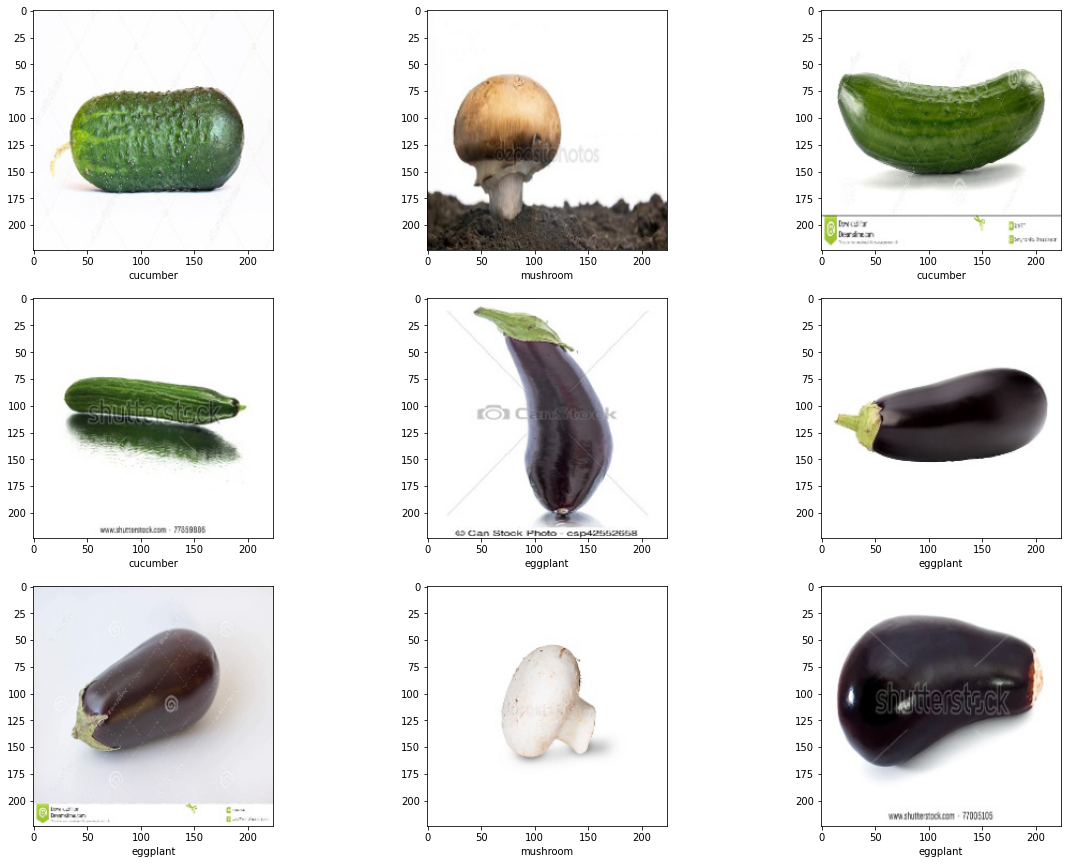

In [237]:
fig = plt.figure(figsize=(20,15))

for i in range(9):
    r = random.randint(1,186)
    plt.subplot(3,3,i+1)
    # plt.axis('off')
    plt.imshow(images[r])
    plt.xlabel(names[r])
    
plt.show()

### **Convert xml files to dict to extract bounding box dimensions**

In [28]:
!pip3 install xmltodict

In [144]:
bboxes = []
classes_name = []

In [146]:
import xmltodict


for xmlfile in annotate_file:
  x = xmltodict.parse(open(xmlfile,'rb'))
  
  bndbox = x['annotation']['object']['bndbox']
  image_size = x['annotation']['size']

  '''
    >> print(x['annotation']['object']['bndbox'])  
    >> OrderedDict([('xmin', '22'), ('ymin', '91'), ('xmax', '198'), ('ymax', '151')])
  '''

  bndbox = np.array([ int(bndbox['xmin']), int(bndbox['ymin']), int(bndbox['xmax']), int(bndbox['ymax'])])
  '''
   >>  print(bndbox)
   >> [ 22  91 198 151]
  '''

  image_width = int(image_size['width'])
  image_height = int(image_size['height'])
  
  '''
  >> print(image_width,image_height)
  >> 227 227
  '''

  bbox2 = [None]*4
  bbox2[0] = bndbox[0]
  bbox2[1] = bndbox[1]
  bbox2[2] = bndbox[2]
  bbox2[3] = bndbox[3]
  
  ## We are now normalizing the bouding box co-ordinated by dividing input_dim=224
  ## at test time we multiply predicted bbox with input_dim to restored the bbbox co-ordinates
  bbox2 = np.array(bbox2)/input_dim
  bboxes.append(bbox2)
  
  classes_name.append( x['annotation']['object']['name'])

References : 

 * [arpitjain007 - bounding box regression](https://www.kaggle.com/arpitjain007/bounding-box-regression)

In [147]:
bboxes[:4]

[array([0.23214286, 0.10267857, 0.95089286, 0.90178571]),
 array([0.11160714, 0.28571429, 0.79464286, 0.82142857]),
 array([0.10714286, 0.28125   , 0.90625   , 0.71875   ]),
 array([0.10714286, 0.04910714, 0.95982143, 0.94642857])]

In [148]:
classes_name[:4]

['eggplant', 'eggplant', 'cucumber', 'eggplant']

In [149]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

### **Create training and testing data**


In [150]:
boxes = np.array(bboxes)
encoder = LabelBinarizer()
classes_onehot = encoder.fit_transform(classes_name)

In [151]:
boxes[:4]

array([[0.23214286, 0.10267857, 0.95089286, 0.90178571],
       [0.11160714, 0.28571429, 0.79464286, 0.82142857],
       [0.10714286, 0.28125   , 0.90625   , 0.71875   ],
       [0.10714286, 0.04910714, 0.95982143, 0.94642857]])

In [227]:
'''
[1,0,0] represent 'cucumber'
[0,1,0] represent 'eggplant'
[0,0,1] represent 'mushroom'
'''

classes_onehot[:4]

array([[0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0]])

In [153]:
x = np.array(images)
y = np.concatenate( [boxes, classes_onehot], axis=1)

In [154]:
print(y[3])

[0.10714286 0.04910714 0.95982143 0.94642857 0.         1.
 0.        ]


In [155]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)

### **Calculate Intersection over Union**

<p align="center"><img src="https://www.researchgate.net/profile/Zhangyang_Wang/publication/305857552/figure/fig1/AS:614045530988550@1523411271401/Illustration-of-IoU-loss-and-2-loss-for-pixel-wise-bounding-box-prediction.png" width="60%"/>


References :
* [https://gist.github.com/meyerjo/dd3533edc97c81258898f60d8978eddc](https://gist.github.com/meyerjo/dd3533edc97c81258898f60d8978eddc)

* [Pyimagesearch - intersection over union iou for object detection](https://www.pyimagesearch.com/2016/11/07/intersection-over-union-iou-for-object-detection/)

In [157]:
from tensorflow.keras import backend as K

In [158]:
@tf.function
def calculate_iou( target_boxes, pred_boxes ):

    # determine the (x, y)-coordinates of the intersection rectangle
    xA = K.maximum(target_boxes[:,0], pred_boxes[:,0])
    yA = K.maximum(target_boxes[:,1], pred_boxes[:,1])
    xB = K.minimum(target_boxes[:,2], pred_boxes[:,2])
    yB = K.minimum(target_boxes[:,3], pred_boxes[:,3])
    
    # compute the area of intersection rectangle (w*h)
    interArea = K.maximum(0.0, xB-xA)*K.maximum(0.0,yB-yA)
 
    # compute the area of both the prediction and ground-truth
    # area of rectangles = w*h
    boxAarea = (target_boxes[:,2]-target_boxes[:,0])*(target_boxes[:,3]-target_boxes[:,1])
    boxBarea = (pred_boxes[:,2]-pred_boxes[:,0]) * (pred_boxes[:,3]-pred_boxes[:,1])

    # compute the intersection over union by taking the intersection
    # area and dividing it by the sum of prediction + ground-truth
    # areas - the interesection area

    '''
      explanation : https://www.youtube.com/watch?v=AZr64OxshLo
    '''

    iou = interArea / (boxAarea+boxBarea - interArea)

    # return the intersection over union value
    return iou


### **loss function**

For **classification** : we use categorical cross entropy loss / sparse categorical entropy loss

For **localization** : we use Mean square error loss or L2 loss

<p align="center"><img src="https://miro.medium.com/max/3816/1*NTVoRZYBWbwRxNidyLCxPw.png" width="60%"/>


In [91]:
# @tf.function
# def custom_loss( y_true, y_pred):
    
#     '''
#         (Softmax loss) Categorical loss : classes_name
#     '''
#     categorical_loss = tf.keras.losses.categorical_crossentropy(y_true, y_pred)
    
#     '''
#         Mean square error loss for bouding box
#     '''
#     mse = tf.losses.mean_squared_error( y_true, y_pred)  
#     # iou = calculate_iou( y_true, y_pred)
#     return mse + categorical_loss

In [298]:
@tf.function

def custom_loss(y_true, y_pred):
    mse = tf.losses.mean_squared_error(y_true, y_pred)
    iou = calculate_iou(y_true , y_pred)
    return mse + (1-iou)

In [160]:
@tf.function
def iou_metric( y_true, y_pred):
    return calculate_iou(y_true, y_pred)

### **Creating a dataloader**

In [161]:
num_classes = 3
pred_vector_length = 4 + num_classes   # 4 for bouding box + 3 for classes
alpha = 0.25

### **Build model**

In [162]:
print("[INFO] Defining Architecture ....")

input_shape = (input_dim, input_dim, 3)

model = tf.keras.Sequential()

'''
strides=1, padding = 'same', kernel_initializer = he_uniform(), kernel_regularizer = l2(0.001)
'''

model.add(Conv2D(filters=16,kernel_initializer='he_normal',kernel_size = (3,3), input_shape = input_shape))
model.add(LeakyReLU(alpha=alpha))
model.add(Conv2D(filters=16,kernel_initializer='he_normal',kernel_size = (3,3)))
model.add(LeakyReLU(alpha=alpha))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.2))


model.add(Conv2D(filters=32,kernel_initializer='he_normal',kernel_size = (3,3)))
model.add(LeakyReLU(alpha=alpha))
model.add(Conv2D(filters=32,kernel_initializer='he_normal',kernel_size = (3,3)))
model.add(LeakyReLU(alpha=alpha))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.2))


model.add(Conv2D(filters=64,kernel_initializer='he_normal',kernel_size = (3,3)))
model.add(LeakyReLU(alpha=alpha))
model.add(Conv2D(filters=64,kernel_initializer='he_normal',kernel_size = (3,3)))
model.add(LeakyReLU(alpha=alpha))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.2))


model.add(Conv2D(filters=12,kernel_initializer='he_normal', kernel_size = (3,3)))
model.add(LeakyReLU(alpha=alpha))
model.add(Conv2D(filters=12,kernel_initializer='he_normal', kernel_size = (3,3)))
model.add(LeakyReLU(alpha=alpha))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.2))


model.add(Conv2D(filters=25,kernel_initializer='he_normal', kernel_size = (3,3)))
model.add(LeakyReLU(alpha=alpha))
model.add(Conv2D(filters=25,kernel_initializer='he_normal', kernel_size = (3,3)))
model.add(LeakyReLU(alpha=alpha))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(units = 1280,kernel_initializer='he_uniform'))
model.add(LeakyReLU(alpha=alpha))

model.add(Dense(units = 640,kernel_initializer='he_uniform'))
model.add(LeakyReLU(alpha=alpha))

model.add(Dense(units = 480, kernel_initializer='he_uniform'))
model.add(LeakyReLU(alpha=alpha))

model.add(Dense(units = 120, kernel_initializer='he_uniform'))
model.add(LeakyReLU(alpha=alpha))

model.add(Dense(units = 62, kernel_initializer='he_uniform'))
model.add(LeakyReLU(alpha=alpha))

model.add(Dense(units = pred_vector_length))
model.add(LeakyReLU(alpha=alpha))

[INFO] Defining Architecture ....


In [163]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 222, 222, 16)      448       
_________________________________________________________________
leaky_re_lu_48 (LeakyReLU)   (None, 222, 222, 16)      0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 220, 220, 16)      2320      
_________________________________________________________________
leaky_re_lu_49 (LeakyReLU)   (None, 220, 220, 16)      0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 110, 110, 16)      0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 110, 110, 16)      0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 108, 108, 32)     

### **Compile model**

In [164]:
print("[INFO] Model Compile")

adam = Adam(learning_rate=0.0001, beta_1 = 0.9, beta_2 = 0.999, amsgrad=False)
model.compile(optimizer = adam, loss = custom_loss, metrics = [iou_metric])

[INFO] Model Compile


---
### **Plot model**
---

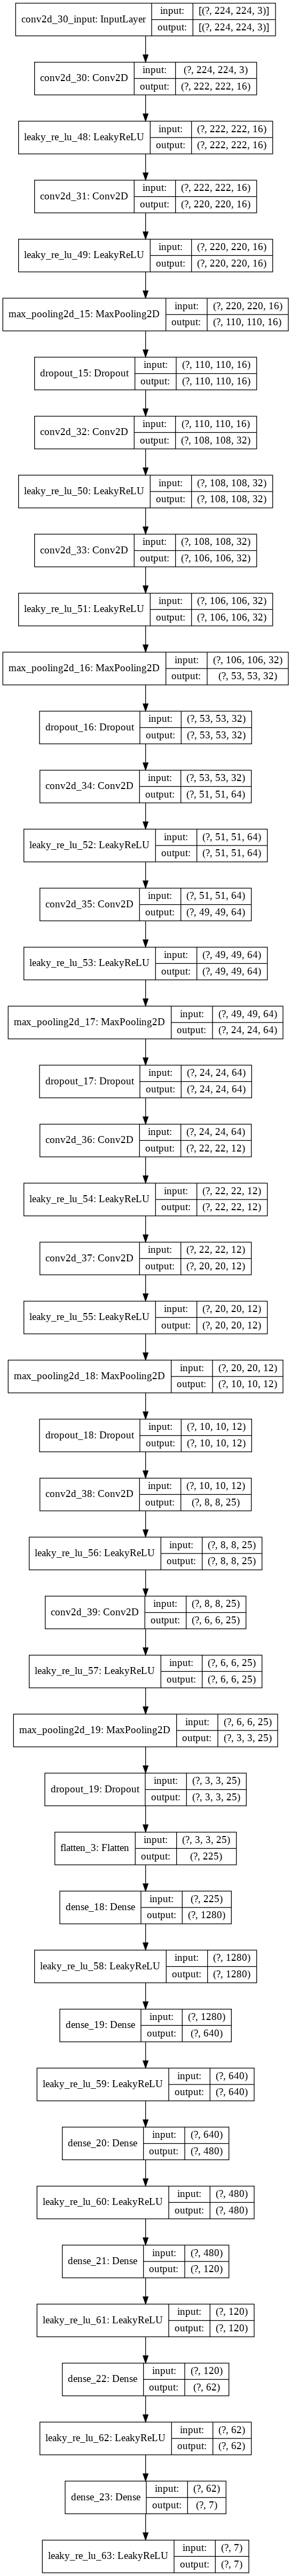

In [165]:
tf.keras.utils.plot_model(model, show_shapes=True)

### **Callbacks**

* EarlyStopping
* ReduceLROnPlateau
* ModelCheckpoint
* TensorBoard

#### **Early Stopping**

In [166]:
'''
Early Stop
To prevent over fitting we will stop the learning after 10 epochs and if val_loss value not decreased
'''
earlystop = EarlyStopping(monitor='val_loss',patience=10)

#### **Learning rate reduction**

We will reduce the learning rate when then accuracy not increase for 7 steps.

In [167]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', 
                                            patience=7, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001
                                            )

#### **Model checkpoint**

In [168]:
filepath = 'model-ep-{epoch:03d}-loss-{loss:.3f}-val_loss-{val_loss:.3f}.h5'
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

#### **TensorBoard**

In [169]:
tensorboard_callback = TensorBoard(log_dir="logs")

In [170]:
callbacks = [earlystop,learning_rate_reduction,checkpoint,tensorboard_callback]

### **Fit the model**

In [171]:
print("[INFO] initilize training config") 

BATCH_SIZE = 3
EPOCHS = 100

[INFO] initilize training config


In [172]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='skimage')

In [173]:
# Run training
print("[INFO] Start Training ...")

history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = EPOCHS, batch_size = BATCH_SIZE, callbacks=callbacks, verbose=1)

model.save('image_localization_vegetable_Dataset.h5') 

[INFO] Start Training ...
Epoch 1/100
56/56 [==============================] - ETA: 0s - loss: 1.4121 - iou_metric: 0.1173
Epoch 00001: val_loss improved from inf to 1.26267, saving model to model-ep-001-loss-1.412-val_loss-1.263.h5
56/56 [==============================] - 3s 59ms/step - loss: 1.4121 - iou_metric: 0.1173 - val_loss: 1.2627 - val_iou_metric: 0.0114 - lr: 1.0000e-04
Epoch 2/100
55/56 [============================>.] - ETA: 0s - loss: 0.8662 - iou_metric: 0.3080
Epoch 00002: val_loss did not improve from 1.26267
56/56 [==============================] - 2s 34ms/step - loss: 0.8644 - iou_metric: 0.3088 - val_loss: 1.2679 - val_iou_metric: 0.0046 - lr: 1.0000e-04
Epoch 3/100
55/56 [============================>.] - ETA: 0s - loss: 0.7495 - iou_metric: 0.3880
Epoch 00003: val_loss did not improve from 1.26267
56/56 [==============================] - 2s 34ms/step - loss: 0.7477 - iou_metric: 0.3887 - val_loss: 1.2659 - val_iou_metric: 0.0041 - lr: 1.0000e-04
Epoch 4/100
55/56 

In [174]:
print('\nhistory dict:', history.history.keys())  


history dict: dict_keys(['loss', 'iou_metric', 'val_loss', 'val_iou_metric', 'lr'])


##**Visualization**

In [175]:
%matplotlib inline
import matplotlib.pyplot as plt

# retrieve a list of list results on training and test data sets for each training epoch
acc = history.history['iou_metric']                         
val_acc = history.history['val_iou_metric']
loss = history.history['loss']
val_loss = history.history['val_loss']
lr = history.history['lr']
epochs = range(len(acc))        ## get number of epochs start from 0

##**Plot training and validation accuracy per epoch**

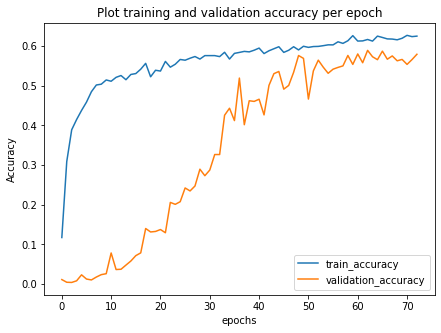

In [177]:
plt.figure(figsize=(7,5))
plt.plot(epochs, acc,label='train_accuracy')
plt.plot(epochs, val_acc,label='validation_accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend(loc="lower right")
plt.title('Plot training and validation accuracy per epoch')
plt.show()


##**Plot training and validation loss per epoch**


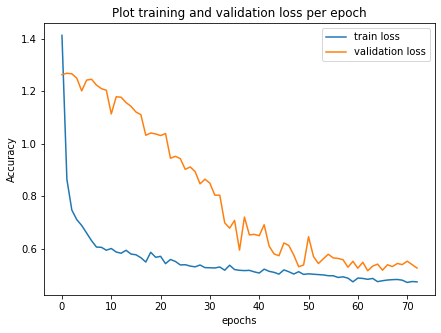

In [178]:
plt.figure(figsize=(7,5))
plt.plot(epochs, loss,label='train loss')
plt.plot(epochs, val_loss,label='validation loss')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend(loc="upper right")
plt.title('Plot training and validation loss per epoch')
plt.show()

## **Plot Epoch vs learning rate**

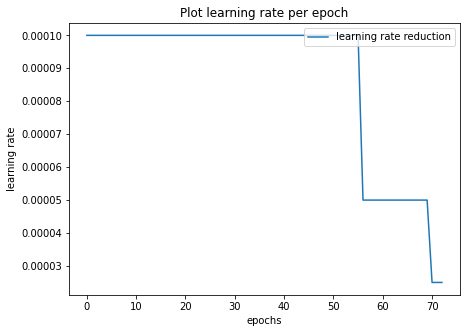

In [179]:
plt.figure(figsize=(7,5))
plt.plot(epochs, lr,label='learning rate reduction')
plt.xlabel('epochs')
plt.ylabel('learning rate')
plt.legend(loc="upper right")
plt.title('Plot learning rate per epoch')
plt.show()

## **Tensorboard in action**

In [180]:

# '''
# If you are already in the directory where TensorFlow writes its logs, you should specify the port first:

# tensorboard --port=6007 --logdir = logs
# type localhost:6006 in chrome
# '''

# %load_ext tensorboard
%reload_ext tensorboard

%tensorboard --logdir=logs

<IPython.core.display.Javascript object>

## **Save the weight**

In [181]:
## Save the weight

'''
Here we are storing both model and weights
'''

model.save_weights("weights/Object_localization_vegetable_weights.temp.hd5",overwrite=True)

In [185]:
x_test[1].shape

(224, 224, 3)

### **Model Prediction**

In [289]:
from PIL import Image

def drawbox(model,image, y_true, le):
    img = tf.cast(np.expand_dims(image, axis=0), tf.float32)
    y_true = np.expand_dims(y_true, axis=0)
    
    # Prediction
    predict = model.predict(img)
    
    # Box coordinates
    Y_test_box =y_true[...,0:4]*input_dim
    pred_box = predict[...,0:4]*input_dim

    x = pred_box[0][0]
    y = pred_box[0][1]
    w = pred_box[0][2]
    h = pred_box[0][3]

    # Get class name
    trans= le.inverse_transform(predict[...,4:])
    

    Y_test_box = tf.cast(Y_test_box, np.float32)
    iou = calculate_iou(Y_test_box, pred_box)
    
    # im = PIL.Image.fromarray(image)
    im = Image.fromarray((image * 255).astype(np.uint8))
    draw=ImageDraw.Draw(im)
    draw.rectangle([x,y,w,h], outline='green')
    plt.title('IOU : %.2f' % iou[0].numpy(),fontsize=16)
    plt.imshow(im)
    
    fig.savefig('prediction.jpg')
 

As due to less data ,the class name prediction was some time giving us false result.

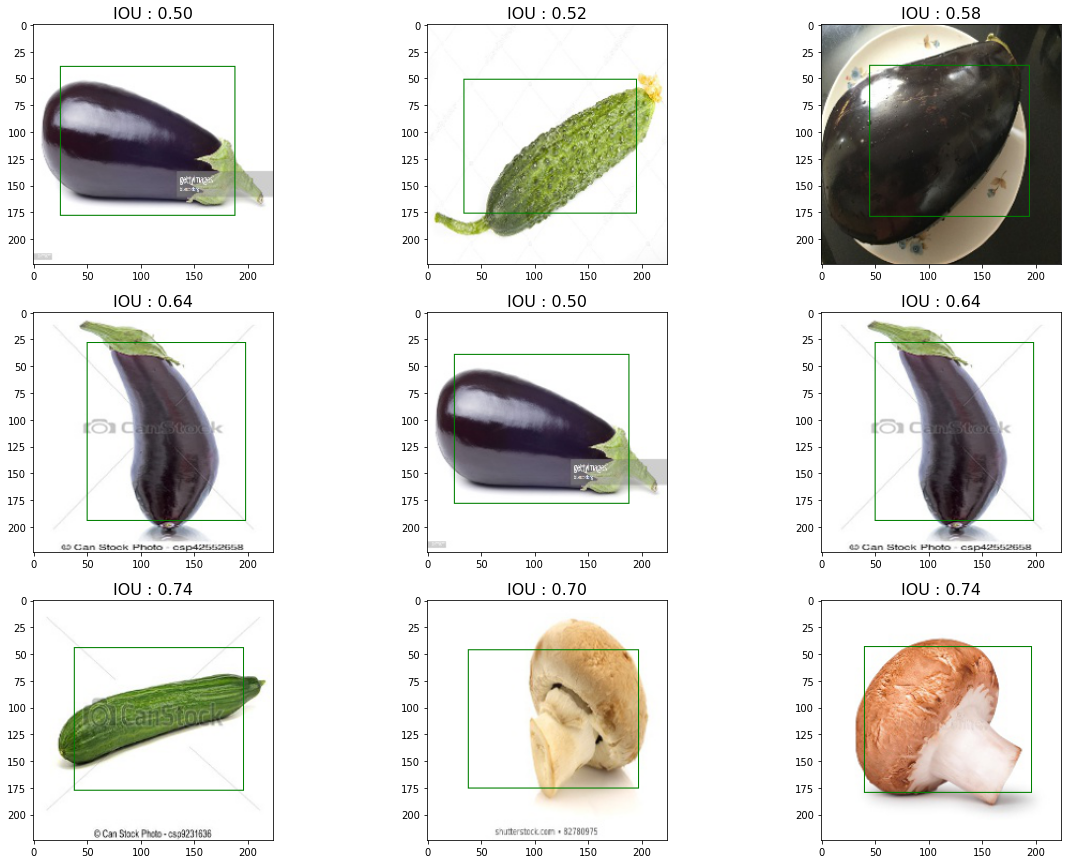

In [296]:
fig = plt.figure(figsize=(20,15))

for i in range(9):
    r = random.randint(0,20)
    plt.subplot(3,3,i+1)
    drawbox(model,x_test[r], y_test[r], encoder)    
plt.show()